In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")

In [3]:
train_data = data.copy()

In [4]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
round(train_data.describe(), 3).T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.828,14.489,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.688,666.718,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077,1611.489,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729,604.696,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.139,1136.706,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.855,1145.717,0.0,0.0,0.0,46.0,24133.0


In [7]:
train_data["Age"].min(), train_data["Age"].max()

(0.0, 79.0)

In [8]:
train_data["RoomService"].min(), train_data["RoomService"].max()

(0.0, 14327.0)

In [9]:
features = ["ShoppingMall", "Spa", "VRDeck"]
for feature in features:
    print(train_data[feature].max(), "|", train_data[feature].min())

23492.0 | 0.0
22408.0 | 0.0
24133.0 | 0.0


## Some Histograms

In [10]:
def plot_hist(data: pd.DataFrame, feature: str):
    bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
    ax = data[feature].plot.hist(bins=bins, edgecolor='black', color='green', alpha=0.7)
    ax.set_yscale("log")
    ax.set_xlabel(feature)

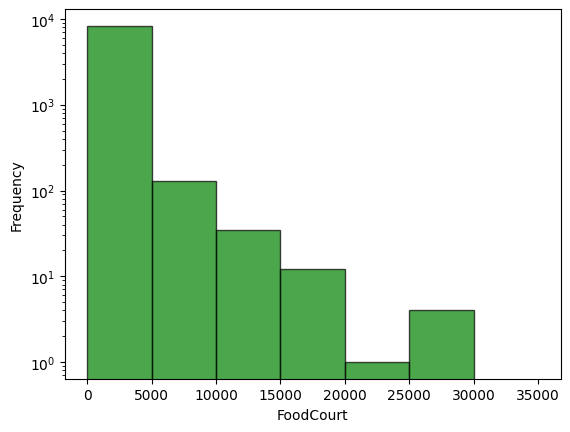

In [11]:
plot_hist(train_data, "FoodCourt")

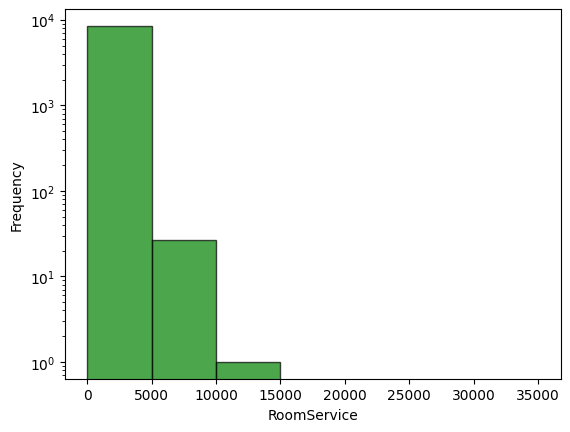

In [12]:
plot_hist(train_data, "RoomService")

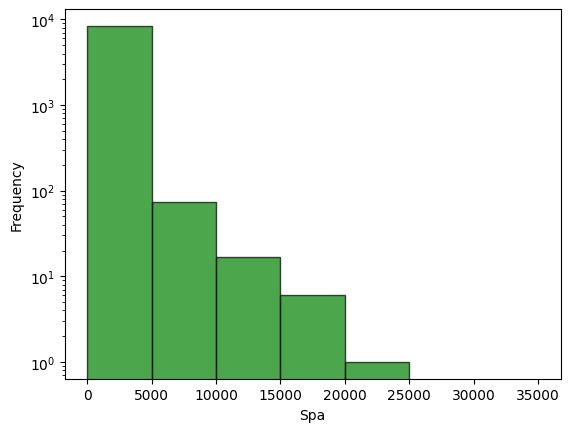

In [13]:
plot_hist(train_data, "Spa")

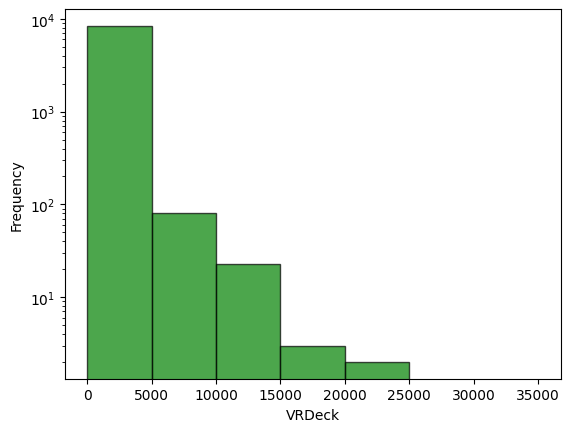

In [14]:
plot_hist(train_data, "VRDeck")

<Axes: ylabel='Frequency'>

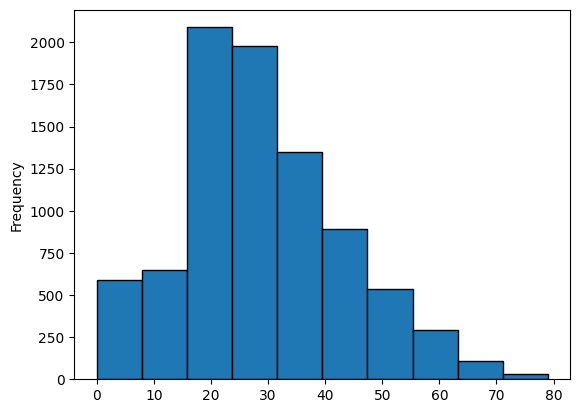

In [15]:
train_data["Age"].plot.hist(edgecolor='black')

In [16]:
train_data["TotalSpending"] = train_data["RoomService"] + train_data["ShoppingMall"] + train_data["Spa"] + train_data["VRDeck"] + train_data["FoodCourt"]

In [17]:
train_data["TotalSpending"].min(), train_data["TotalSpending"].max()

(0.0, 35987.0)

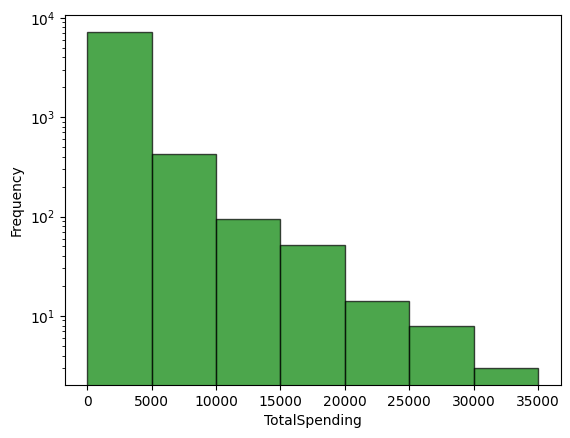

In [18]:
plot_hist(train_data, "TotalSpending")

In [19]:
train_data = train_data.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name"], axis=1)

In [20]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,TotalSpending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True,1091.0


In [21]:
total_spending = train_data.pop("TotalSpending")
train_data.insert(train_data.columns.get_loc("Transported"), "TotalSpending", total_spending)

In [22]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,TotalSpending,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,736.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,1091.0,True


## Pie Charts

In [23]:
def pie(data: pd.DataFrame, feature: str):
    # value counts including NaN values
    value_counts = data[feature].value_counts(dropna=False)
    value_counts.index = value_counts.index.fillna('NaN')
    value_counts.plot.pie(autopct='%1.1f%%',
                        colors=sns.color_palette("viridis",
                        len(value_counts)),
                        pctdistance=1.16,
                        labeldistance=.6,
                        radius=1)
    
    plt.title(f"Pie chart of {feature}")
    plt.ylabel('')
    plt.show()

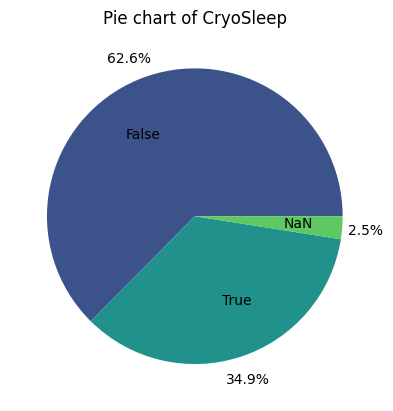

In [24]:
pie(train_data, "CryoSleep")

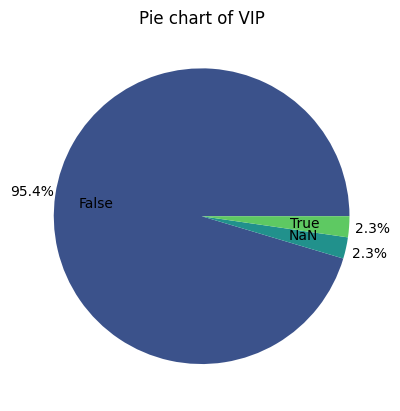

In [25]:
pie(train_data, "VIP")

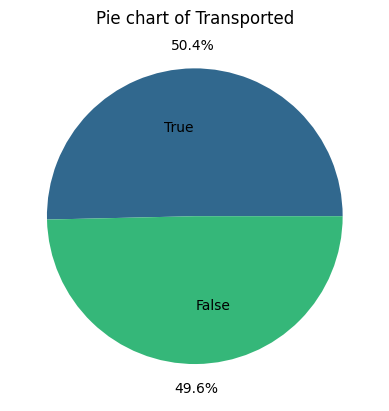

In [26]:
pie(train_data, "Transported")

## Count Plots

In [27]:
def relationshipWithTarget(data: pd.DataFrame, feature: str, hue: str="Transported") -> None:
    df = data.copy()
    if df[feature].isna().sum() > 0:
        df[feature] = df[feature].fillna('Unknown')
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue=hue, palette='viridis')
    plt.title(f"Relationship between {feature} and {hue}")
    plt.xlabel(feature)
    plt.ylabel(hue)
    plt.show()

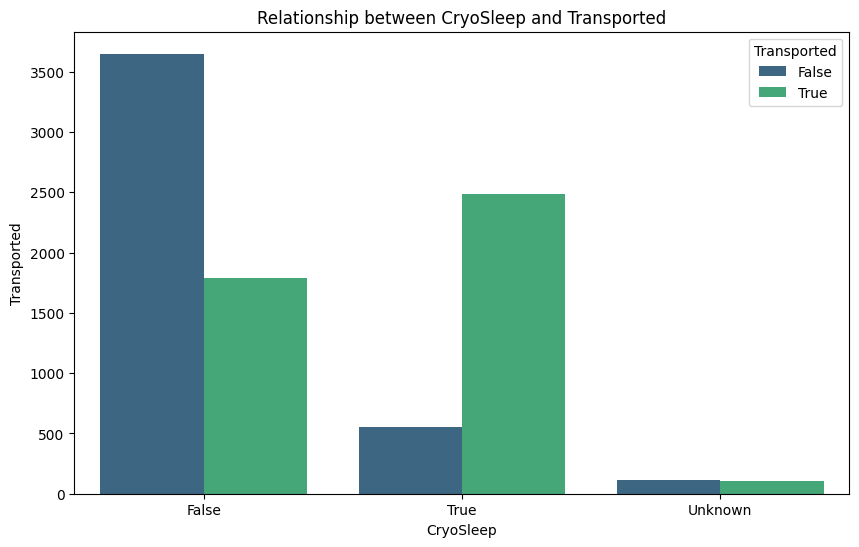

In [28]:
relationshipWithTarget(train_data, "CryoSleep")

### People in cryosleep tends to Transported More (Important feature)

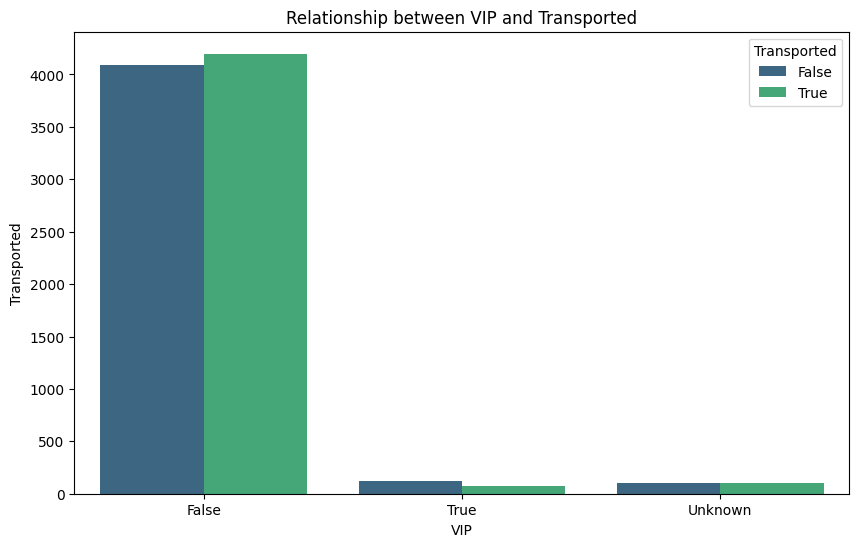

In [29]:
relationshipWithTarget(train_data, "VIP")

In [30]:
train_data["CryoSleep"].mode()

0    False
Name: CryoSleep, dtype: object

In [31]:
def countplot(data: pd.DataFrame, x: str, hue: str) -> None:
    """One categorical feature against another categorical feature"""
    sns.countplot(data=data, x=x, palette="viridis", hue=hue)
    plt.ylabel(hue)

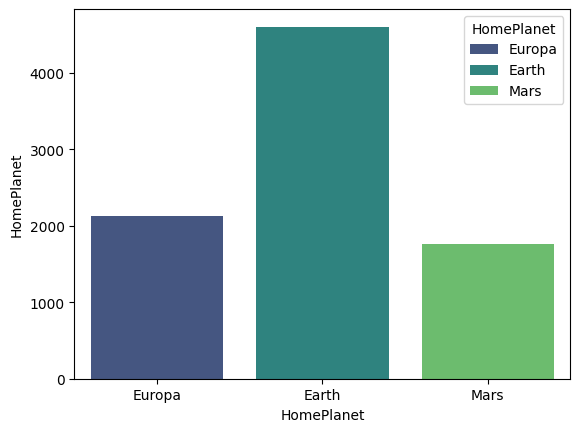

In [32]:
countplot(train_data, "HomePlanet", "HomePlanet")

### Most Passengers are from Earth. Second is Europa and then mars

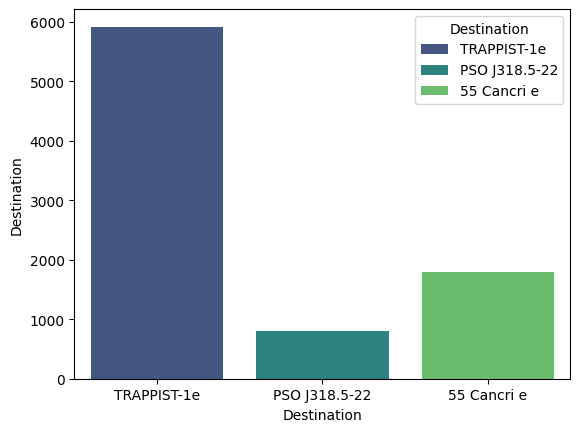

In [33]:
countplot(train_data, "Destination", 'Destination')

### Most Passengers Destination is Trappist. Second is Cancri and then PSO

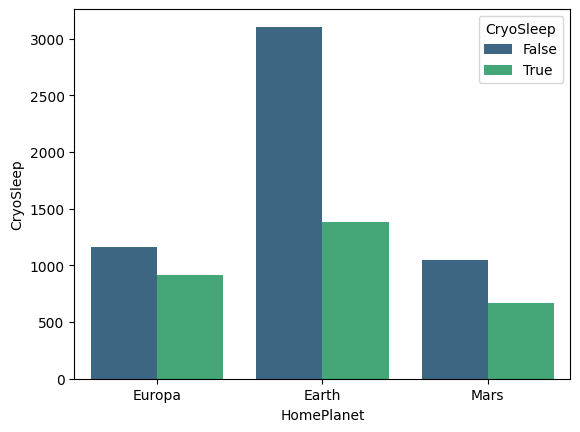

In [34]:
countplot(train_data, x="HomePlanet", hue="CryoSleep")

### From Earth Most of them are not in Cryosleep. Second is Mars and than Europa.

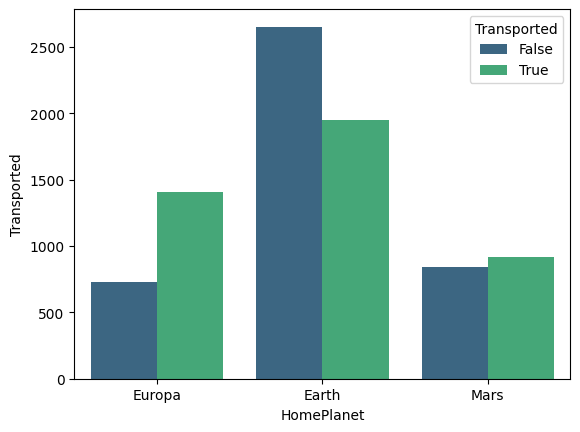

In [35]:
countplot(train_data, x="HomePlanet", hue="Transported")

### People from Europa have more sucess rate than others, than Mars. But Earth have more failure rate than success.

#### People from Europa are safer.

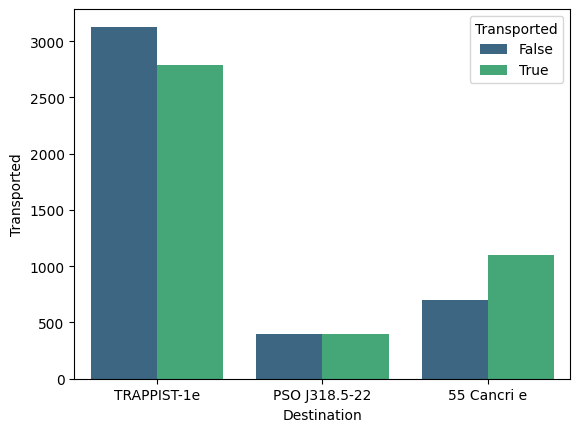

In [36]:
countplot(train_data, x="Destination", hue="Transported")

### Only Cancri have more sucess rate than others

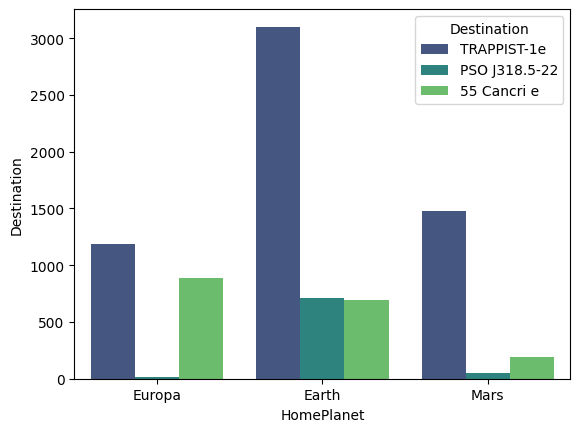

In [37]:
countplot(train_data, x="HomePlanet", hue="Destination")

### Checking null values

In [38]:
train_data.isna().sum()

PassengerId        0
HomePlanet       201
CryoSleep        217
Cabin            199
Destination      182
Age              179
VIP              203
TotalSpending    908
Transported        0
dtype: int64

In [39]:
train_data["HomePlanet"].mode()[0]

'Earth'

In [40]:
train_data["Destination"].mode()

0    TRAPPIST-1e
Name: Destination, dtype: object

In [41]:
train_data["HomePlanet"] = train_data["HomePlanet"].fillna(train_data["HomePlanet"].mode()[0])
train_data["Destination"] = train_data["Destination"].fillna(train_data["Destination"].mode()[0])

In [42]:
train_data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep        217
Cabin            199
Destination        0
Age              179
VIP              203
TotalSpending    908
Transported        0
dtype: int64

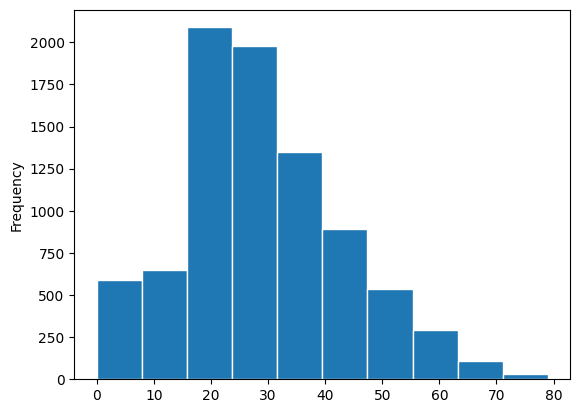

In [43]:
train_data["Age"].plot.hist(edgecolor="white");

### Most ages are from 16-32 (approx)

In [44]:
train_data["Age"].median()

27.0

In [45]:
train_data["Age"].mean()

28.82793046746535

In [46]:
train_data["Age"].mode()

0    24.0
Name: Age, dtype: float64

In [47]:
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())

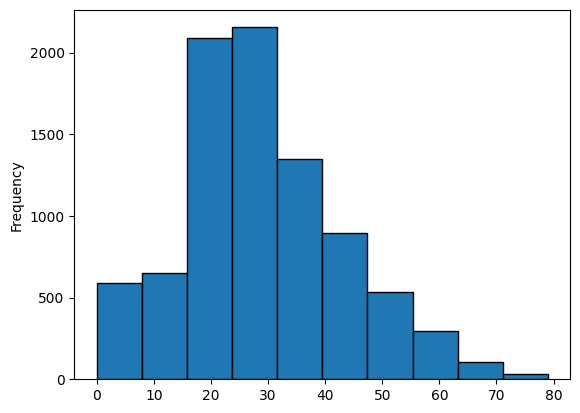

In [48]:
train_data["Age"].plot.hist(edgecolor="black");

In [49]:
train_data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep        217
Cabin            199
Destination        0
Age                0
VIP              203
TotalSpending    908
Transported        0
dtype: int64

In [50]:
len(train_data["TotalSpending"])

8693

In [51]:
train_data["TotalSpending"].dtypes

dtype('float64')

In [52]:
def stat(data: pd.Series) -> None:
    # Check the data type of the series
    if pd.api.types.is_numeric_dtype(data):
        print(f"Mean: {data.mean()}\nMedian: {data.median()}")
    elif pd.api.types.is_categorical_dtype(data) or data.dtype == 'object':
        print(f"Mode: {data.mode()[0]}")

In [53]:
stat(train_data["TotalSpending"])

Mean: 1484.6015414258188
Median: 736.0


In [54]:
stat(train_data["Age"])

Mean: 28.790291038766824
Median: 27.0


In [55]:
from scipy.stats import trim_mean
trim_mean(train_data["TotalSpending"], 0.1)

nan

In [56]:
spending_By_homeplanet = train_data.groupby("HomePlanet")["TotalSpending"].sum().reset_index()

In [57]:
spending_By_homeplanet

,HomePlanet,TotalSpending
0,Earth,3033199.0
1,Europa,6828385.0
2,Mars,1696039.0


In [58]:
spending_By_homeplanet = spending_By_homeplanet.sort_values(by='TotalSpending', ascending=False)

In [59]:
spending_By_homeplanet

,HomePlanet,TotalSpending
1,Europa,6828385.0
0,Earth,3033199.0
2,Mars,1696039.0


<Figure size 1200x600 with 0 Axes>

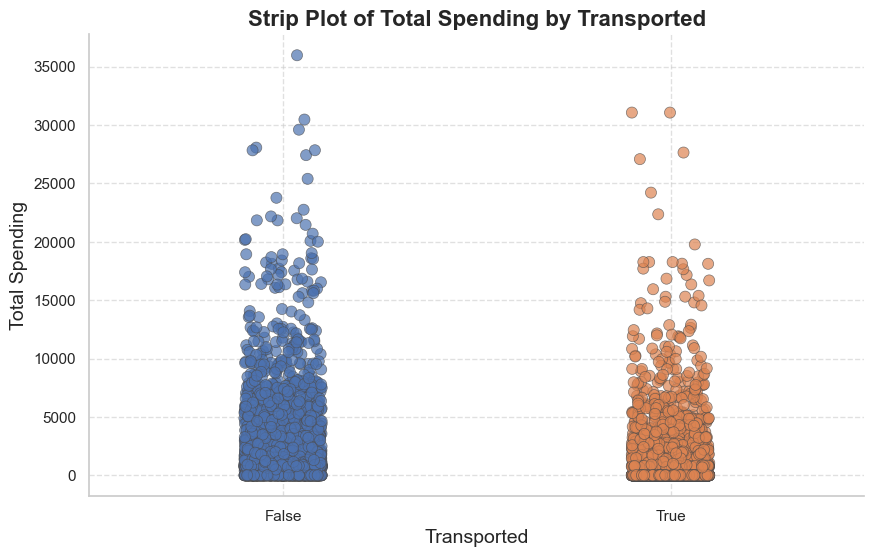

In [60]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid", palette='deep', context="notebook")

plt.figure(figsize=(10, 6))
sns.stripplot(x='Transported', y='TotalSpending', data=train_data, jitter=True, 
              hue="Transported", alpha=0.7, size=8, linewidth=0.5, edgecolor='auto', legend=False)

plt.title('Strip Plot of Total Spending by Transported', fontsize=16, fontweight='bold')
plt.xlabel('Transported', fontsize=14)
plt.ylabel('Total Spending', fontsize=14)

sns.despine()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

## Transported (False) have higher desnity of spending

In [61]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,TotalSpending,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,736.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,10383.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,5176.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,1091.0,True


In [62]:
gg = train_data["PassengerId"].str.split("_").str[0]

In [63]:
gg.head()

0    0001
1    0002
2    0003
3    0003
4    0004
Name: PassengerId, dtype: object

In [64]:
# deck/num/side

In [65]:
deck = train_data["Cabin"].str.split("/").str[0]
num = train_data["Cabin"].str.split("/").str[1]
side = train_data["Cabin"].str.split("/").str[2]

In [66]:
deck.unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [67]:
deck.value_counts()

Cabin
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [68]:
train_data["Deck"] = train_data["Cabin"].str.split("/").str[0]

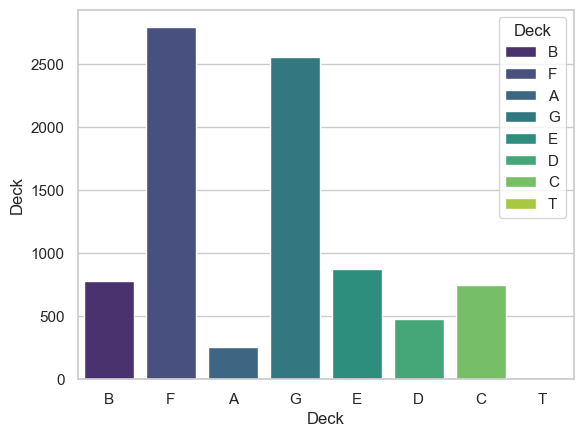

In [69]:
countplot(train_data, "Deck", "Deck")

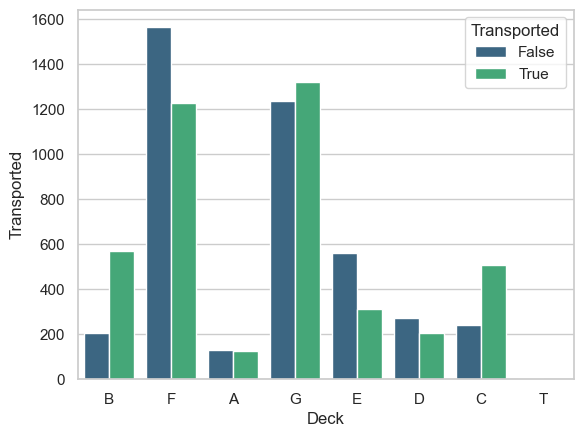

In [70]:
countplot(train_data, "Deck", "Transported")

### B have highest success rate

In [71]:
group1 = train_data.groupby("HomePlanet")["Deck"].value_counts().reset_index()

In [72]:
pivot_table1 = group1.pivot_table(values="count", index="HomePlanet", columns="Deck", aggfunc="sum", fill_value=0)

In [73]:
pivot_table1

Deck,A,B,C,D,E,F,G,T
HomePlanet,,,,,,,,
Earth,4,13,13,10,418,1684,2559,1
Europa,252,766,734,186,128,0,0,4
Mars,0,0,0,282,330,1110,0,0


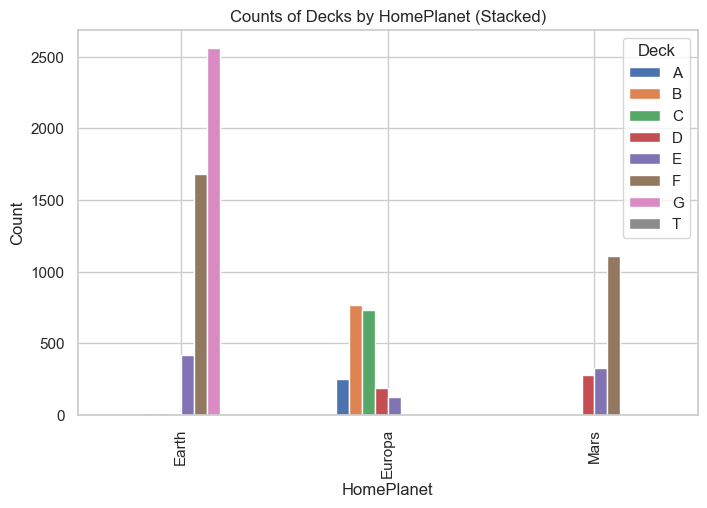

In [74]:
pivot_table1.plot(kind='bar', figsize=(8, 5))
plt.title('Counts of Decks by HomePlanet (Stacked)')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.legend(title='Deck')
plt.show()

# I think Europa have more success rates because it have the attributes of more success rates.

In [75]:
side.unique()

array(['P', 'S', nan], dtype=object)

In [76]:
train_data["Side"] = train_data["Cabin"].str.split("/").str[2]

In [77]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,TotalSpending,Transported,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,False,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,736.0,True,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,10383.0,False,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,5176.0,False,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,1091.0,True,F,S


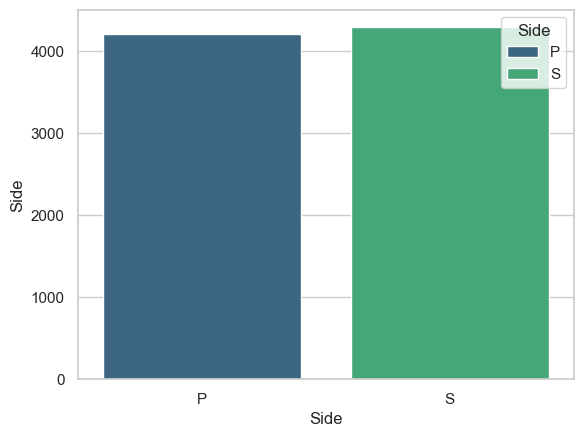

In [78]:
countplot(train_data, "Side", "Side")

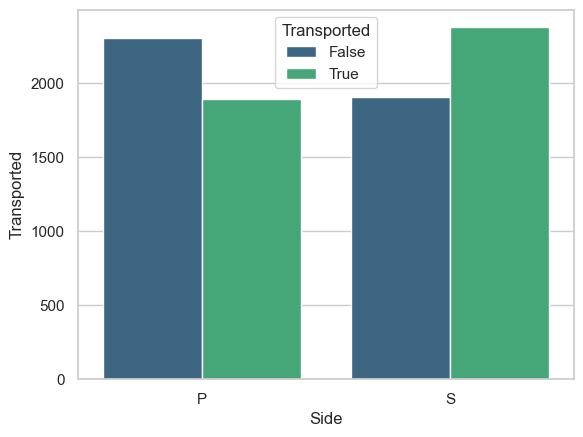

In [79]:
countplot(train_data, "Side", "Transported")

### People who are in Starboard Transported More.

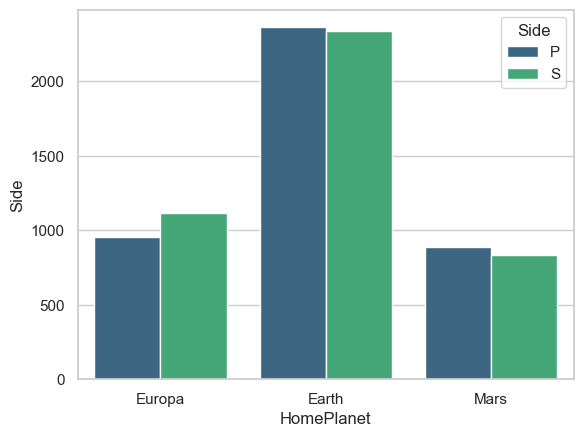

In [80]:
countplot(train_data, "HomePlanet", "Side")

In [81]:
group2 = train_data.groupby("HomePlanet")["Side"].value_counts().reset_index()

In [82]:
group2

,HomePlanet,Side,count
0,Earth,P,2363
1,Earth,S,2339
2,Europa,S,1115
3,Europa,P,955
4,Mars,P,888
5,Mars,S,834


In [83]:
pivot_table2 = group2.pivot_table(values="count", index="HomePlanet", columns="Side", aggfunc="sum", fill_value=True)

In [84]:
pivot_table2

Side,P,S
HomePlanet,,
Earth,2363,2339
Europa,955,1115
Mars,888,834


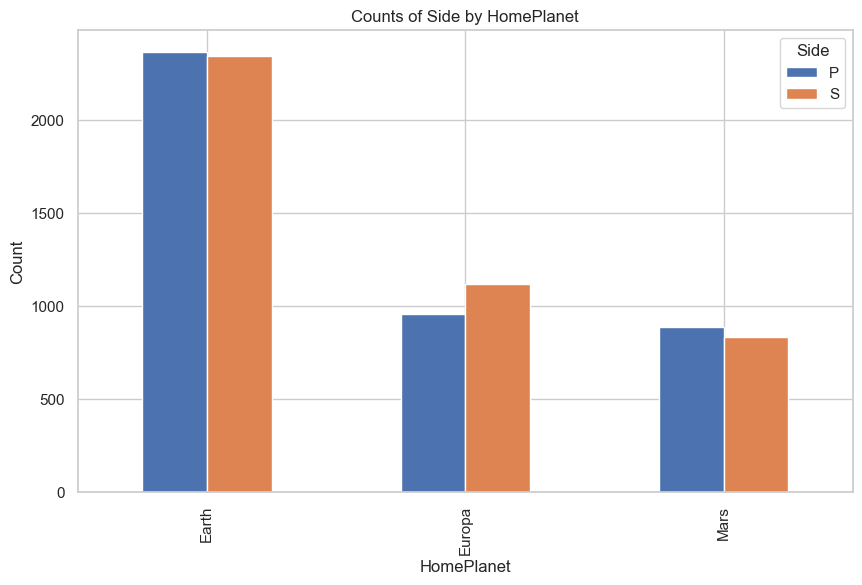

In [85]:
pivot_table2.plot(kind='bar', figsize=(10, 6))
plt.title('Counts of Side by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.legend(title='Side')
plt.show()

### I think Europa have higher success rates because number of passengers in Starboard is higher.

In [86]:
train_data["Num"] = train_data["Cabin"].str.split("/").str[1]

In [87]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,TotalSpending,Transported,Deck,Side,Num
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,False,B,P,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,736.0,True,F,S,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,10383.0,False,A,S,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,5176.0,False,A,S,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,1091.0,True,F,S,1


In [88]:
train_data["Side"].mode()

0    S
Name: Side, dtype: object

In [89]:
train_data["Num"].unique()

array(['0', '1', '2', ..., '1892', '1893', '1894'], dtype=object)

In [90]:
num.head()

0    0
1    0
2    0
3    0
4    1
Name: Cabin, dtype: object

C:\Users\HiimR\AppData\Local\Temp\ipykernel_14848\1776350071.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transported_rate = df.groupby('AgeGroup')['Transported'].mean()


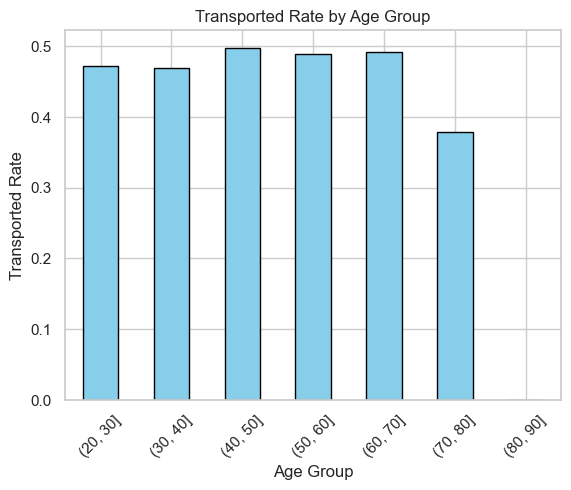

In [91]:
bins = [20, 30, 40, 50, 60, 70, 80, 90]
df = train_data.copy()
# Create age bins
df['AgeGroup'] = pd.cut(df['Age'], bins)

# Calculate the Transported rate for each AgeGroup
transported_rate = df.groupby('AgeGroup')['Transported'].mean()

# Plot the transported rate
transported_rate.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Transported Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Transported Rate')
plt.xticks(rotation=45)
plt.show()

In [92]:
(train_data["Age"] > 0).value_counts()

Age
True     8515
False     178
Name: count, dtype: int64

In [93]:
# Drop the rows where Age < 0.

In [94]:
train_data = train_data[train_data["Age"] > 0]

## Transportation Rate Of Null Values

In [95]:

# Identify columns with null values
null_columns = train_data.columns[train_data.isnull().any()]

# Initialize a dictionary to store results
null_transportation_summary = {}

# Check the "Transported" values for rows where each feature is null
for column in null_columns:
    null_transportation_summary[column] = train_data[train_data[column].isnull()]['Transported'].value_counts()

# Print the summary
for column, value_counts in null_transportation_summary.items():
    print(f"\nTransported values for rows where {column} is null:")
    print(value_counts)


Transported values for rows where CryoSleep is null:
Transported
False    109
True     105
Name: count, dtype: int64

Transported values for rows where Cabin is null:
Transported
False    98
True     98
Name: count, dtype: int64

Transported values for rows where VIP is null:
Transported
False    99
True     98
Name: count, dtype: int64

Transported values for rows where TotalSpending is null:
Transported
True     450
False    438
Name: count, dtype: int64

Transported values for rows where Deck is null:
Transported
False    98
True     98
Name: count, dtype: int64

Transported values for rows where Side is null:
Transported
False    98
True     98
Name: count, dtype: int64

Transported values for rows where Num is null:
Transported
False    98
True     98
Name: count, dtype: int64


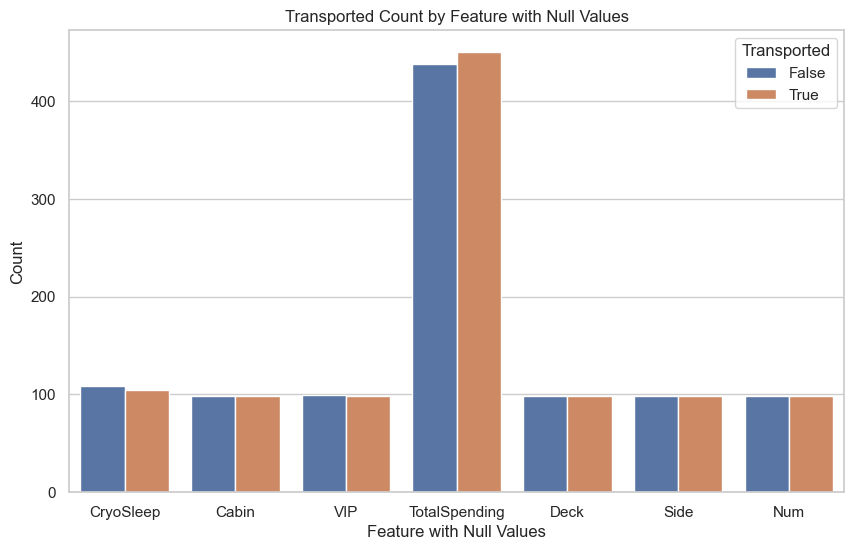

In [96]:
null_columns = train_data.columns[train_data.isnull().any()]

# Initialize a list to store results for visualization
null_transportation_list = []

# Check the "Transported" values for rows where each feature is null
for column in null_columns:
    null_transportation_counts = train_data[train_data[column].isnull()]['Transported'].value_counts()
    for transported_value, count in null_transportation_counts.items():
        null_transportation_list.append((column, transported_value, count))

# Convert the list to a DataFrame for easier plotting
null_transportation_df = pd.DataFrame(null_transportation_list, columns=['Feature', 'Transported', 'Count'])

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=null_transportation_df, x='Feature', y='Count', hue='Transported')
plt.title('Transported Count by Feature with Null Values')
plt.xlabel('Feature with Null Values')
plt.ylabel('Count')
plt.legend(title='Transported', loc='upper right')
plt.show()

In [97]:
round(train_data.isnull().mean() * 100, 2)

PassengerId       0.00
HomePlanet        0.00
CryoSleep         2.51
Cabin             2.30
Destination       0.00
Age               0.00
VIP               2.31
TotalSpending    10.43
Transported       0.00
Deck              2.30
Side              2.30
Num               2.30
dtype: float64

In [98]:
df2 = train_data.copy()

In [99]:
df2.shape

(8515, 12)

In [100]:
df2 = df2.dropna()

In [101]:
df2.shape

(7092, 12)

In [102]:
8515 - 7092

1423

In [103]:
print(f"If I drop null values, I loose {round((1423 / 8515)*100, 2)}% of data.")

If I drop null values, I loose 16.71% of data.


# First Train A Model With Imputing Null Values

In [104]:
train_data["Deck"].mode()

0    F
Name: Deck, dtype: object

In [105]:
train_data["Side"].mode()

0    S
Name: Side, dtype: object

In [106]:
train_data["Side"] = train_data["Side"].fillna(train_data["Side"].mode()[0])
train_data["Deck"] = train_data["Deck"].fillna(train_data["Deck"].mode()[0])

In [107]:
train_data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep        214
Cabin            196
Destination        0
Age                0
VIP              197
TotalSpending    888
Transported        0
Deck               0
Side               0
Num              196
dtype: int64

In [108]:
train_data["CryoSleep"].mode()

0    False
Name: CryoSleep, dtype: object

In [109]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,TotalSpending,Transported,Deck,Side,Num
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,False,B,P,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,736.0,True,F,S,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,10383.0,False,A,S,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,5176.0,False,A,S,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,1091.0,True,F,S,1


In [110]:
train_data = train_data.rename(columns={"Num": "CabinNum"})

In [111]:
train_data["CabinNum"] = pd.to_numeric(train_data["CabinNum"], errors="coerce")

In [112]:
(train_data["CabinNum"] > 0).value_counts()

CabinNum
True     8302
False     213
Name: count, dtype: int64

In [113]:
bins = [0, 1000, 1500, 2000]
train_data["CabinNumBins"] = pd.cut(train_data["CabinNum"], bins)
train_data["CabinNumBinsStr"] = train_data["CabinNumBins"].astype(str)

In [114]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,TotalSpending,Transported,Deck,Side,CabinNum,CabinNumBins,CabinNumBinsStr
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,False,B,P,0.0,NaN,nan
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,736.0,True,F,S,0.0,NaN,nan
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,10383.0,False,A,S,0.0,NaN,nan
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,5176.0,False,A,S,0.0,NaN,nan
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,1091.0,True,F,S,1.0,"(0.0, 1000.0]","(0, 1000]"


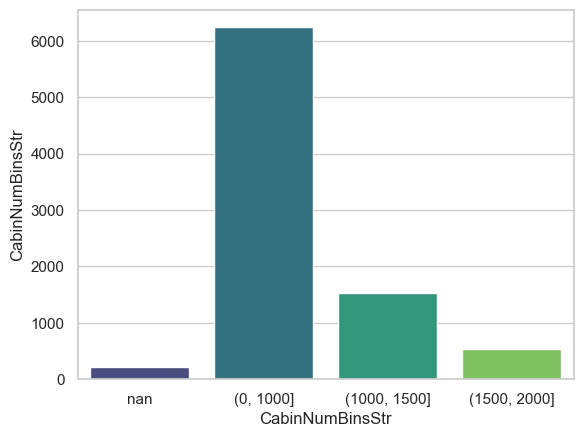

In [115]:
countplot(train_data, x="CabinNumBinsStr", hue="CabinNumBinsStr")

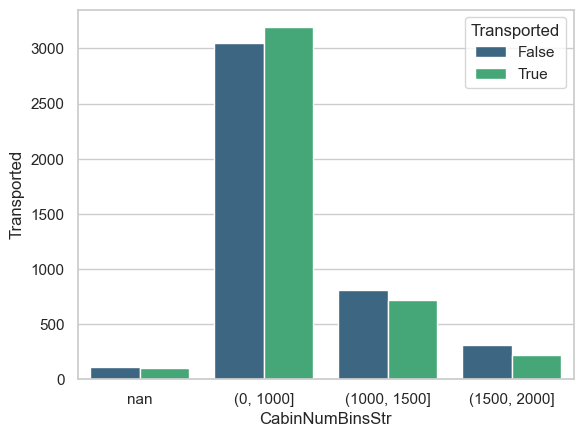

In [116]:
countplot(train_data, x="CabinNumBinsStr", hue="Transported")

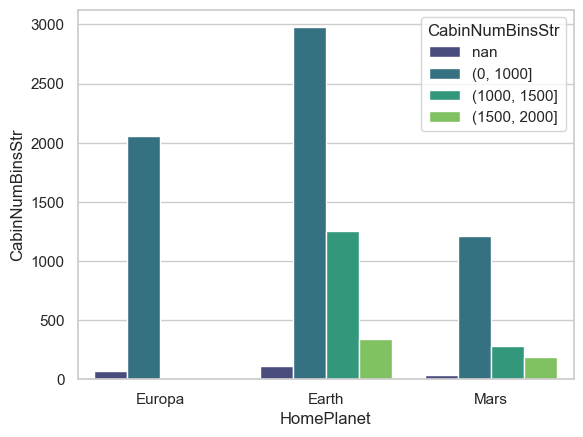

In [117]:
countplot(train_data, "HomePlanet", "CabinNumBinsStr")

In [118]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,TotalSpending,Transported,Deck,Side,CabinNum,CabinNumBins,CabinNumBinsStr
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,False,B,P,0.0,NaN,nan
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,736.0,True,F,S,0.0,NaN,nan
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,10383.0,False,A,S,0.0,NaN,nan
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,5176.0,False,A,S,0.0,NaN,nan
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,1091.0,True,F,S,1.0,"(0.0, 1000.0]","(0, 1000]"


In [119]:
train_data["CabinNumBins"].cat.categories

IntervalIndex([(0, 1000], (1000, 1500], (1500, 2000]], dtype='interval[int64, right]')

In [120]:
bin_labels = train_data["CabinNumBins"].cat.categories
bin_rank_mapping = {str(bin_label): rank for rank, bin_label in enumerate(bin_labels, start=1)}

In [121]:
bin_rank_mapping

{'(0, 1000]': 1, '(1000, 1500]': 2, '(1500, 2000]': 3}

In [122]:
train_data["CabinNumBinsRank"] = train_data["CabinNumBinsStr"].map(bin_rank_mapping)

In [123]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,TotalSpending,Transported,Deck,Side,CabinNum,CabinNumBins,CabinNumBinsStr,CabinNumBinsRank
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,False,B,P,0.0,NaN,nan,NaN
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,736.0,True,F,S,0.0,NaN,nan,NaN
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,10383.0,False,A,S,0.0,NaN,nan,NaN
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,5176.0,False,A,S,0.0,NaN,nan,NaN
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,1091.0,True,F,S,1.0,"(0.0, 1000.0]","(0, 1000]",1.0


In [124]:
train_data = train_data.drop(columns=["CabinNumBins", "CabinNumBinsStr"])

In [125]:
train_data = train_data.drop(columns=["Cabin"])

In [126]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,TotalSpending,Transported,Deck,Side,CabinNum,CabinNumBinsRank
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,False,B,P,0.0,NaN
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,736.0,True,F,S,0.0,NaN
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,10383.0,False,A,S,0.0,NaN
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,5176.0,False,A,S,0.0,NaN
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,1091.0,True,F,S,1.0,1.0


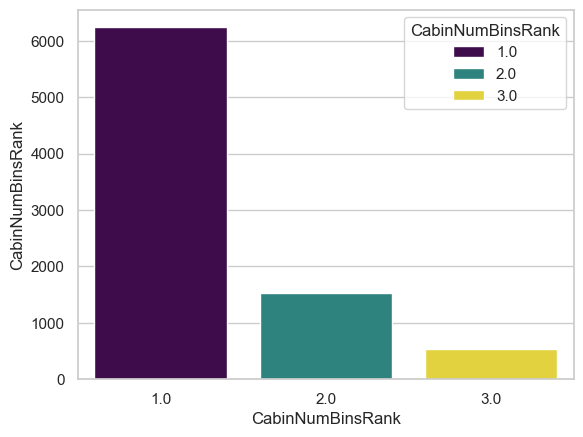

In [127]:
countplot(train_data, "CabinNumBinsRank", "CabinNumBinsRank")

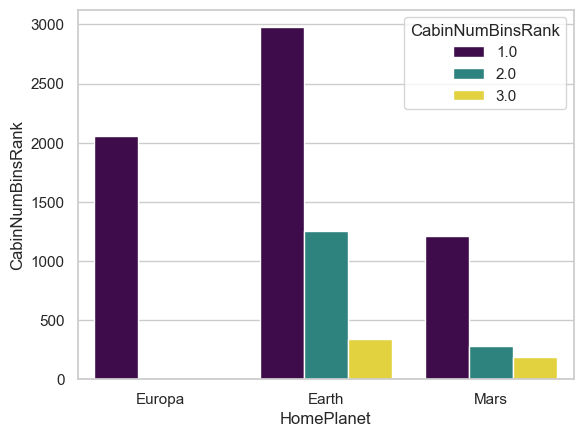

In [128]:
countplot(train_data, "HomePlanet", "CabinNumBinsRank")

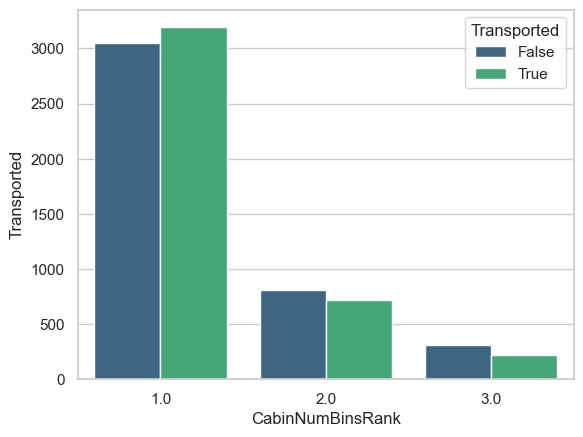

In [129]:
countplot(train_data, "CabinNumBinsRank", "Transported")

In [130]:
(train_data["CabinNum"] > 0).value_counts()

CabinNum
True     8302
False     213
Name: count, dtype: int64

In [131]:
train_data["CabinNumBinsRank"].isna().sum()

213

In [132]:
train_data["CabinNumBinsRank"].mode()

0    1.0
Name: CabinNumBinsRank, dtype: float64

In [133]:
round(train_data["CabinNumBinsRank"].isna().sum() / len(train_data["CabinNumBinsRank"]) * 100, 3)

2.501

In [134]:
round(train_data["CabinNum"].isna().sum() / len(train_data["CabinNum"]) * 100, 3)

2.302

In [135]:
train_data.isna().sum()

PassengerId           0
HomePlanet            0
CryoSleep           214
Destination           0
Age                   0
VIP                 197
TotalSpending       888
Transported           0
Deck                  0
Side                  0
CabinNum            196
CabinNumBinsRank    213
dtype: int64

In [136]:
stat(train_data["CabinNum"])

Mean: 597.7478062267099
Median: 421.0


In [137]:
stat(train_data["CabinNumBinsRank"])

Mean: 1.312093471452662
Median: 1.0


In [138]:
# Filling all missing values.
train_data["CryoSleep"] = train_data["CryoSleep"].fillna(train_data["CryoSleep"].mode()[0])
train_data["VIP"] = train_data["VIP"].fillna(train_data["VIP"].mode()[0])
train_data["TotalSpending"] = train_data["TotalSpending"].fillna(train_data["TotalSpending"].median())
train_data["CabinNumBinsRank"] = train_data["CabinNumBinsRank"].fillna(train_data["CabinNumBinsRank"].median())
train_data["CabinNum"] = train_data["CabinNum"].fillna(train_data["CabinNum"].median())

C:\Users\HiimR\AppData\Local\Temp\ipykernel_14848\713437722.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data["CryoSleep"] = train_data["CryoSleep"].fillna(train_data["CryoSleep"].mode()[0])
C:\Users\HiimR\AppData\Local\Temp\ipykernel_14848\713437722.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data["VIP"] = train_data["VIP"].fillna(train_data["VIP"].mode()[0])


In [139]:
train_data.isna().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Destination         0
Age                 0
VIP                 0
TotalSpending       0
Transported         0
Deck                0
Side                0
CabinNum            0
CabinNumBinsRank    0
dtype: int64

In [140]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,TotalSpending,Transported,Deck,Side,CabinNum,CabinNumBinsRank
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,False,B,P,0.0,1.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,736.0,True,F,S,0.0,1.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,10383.0,False,A,S,0.0,1.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,5176.0,False,A,S,0.0,1.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,1091.0,True,F,S,1.0,1.0


In [141]:
group = train_data["PassengerId"].str.split("_").str[0]

In [142]:
group.dtype

dtype('O')

In [143]:
train_data["Group"] = train_data["PassengerId"].str.split("_").str[0]

In [144]:
train_data["Group"] = pd.to_numeric(train_data["Group"], errors="coerce")

In [145]:
train_data["Group"]

0          1
1          2
2          3
3          3
4          4
        ... 
8688    9276
8689    9278
8690    9279
8691    9280
8692    9280
Name: Group, Length: 8515, dtype: int64

In [146]:
bins = [0, 2000, 4000, 6000, 8000, 10000]
train_data["GroupBins"] = pd.cut(train_data["Group"], bins)
train_data["GroupBinsStr"] = train_data["GroupBins"].astype(str)
bin_labels = train_data["GroupBins"].cat.categories
bin_rank_mapping = {str(bin_label): rank for rank, bin_label in enumerate(bin_labels, start=1)}
train_data["GroupBinsRank"] = train_data["GroupBinsStr"].map(bin_rank_mapping)

In [147]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,TotalSpending,Transported,Deck,Side,CabinNum,CabinNumBinsRank,Group,GroupBins,GroupBinsStr,GroupBinsRank
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,False,B,P,0.0,1.0,1,"(0, 2000]","(0, 2000]",1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,736.0,True,F,S,0.0,1.0,2,"(0, 2000]","(0, 2000]",1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,10383.0,False,A,S,0.0,1.0,3,"(0, 2000]","(0, 2000]",1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,5176.0,False,A,S,0.0,1.0,3,"(0, 2000]","(0, 2000]",1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,1091.0,True,F,S,1.0,1.0,4,"(0, 2000]","(0, 2000]",1


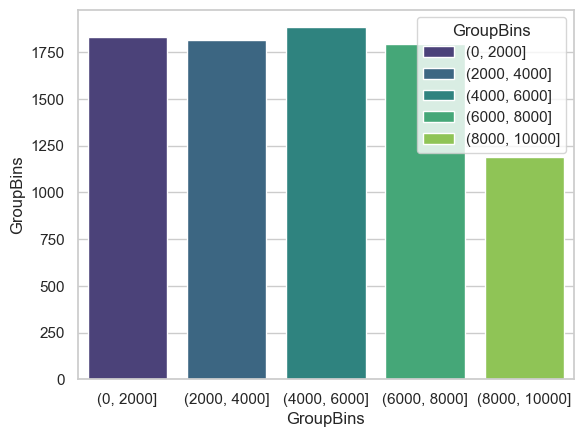

In [148]:
countplot(train_data, "GroupBins", "GroupBins")

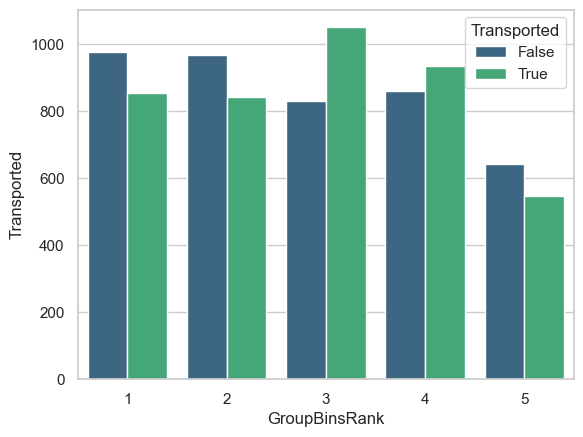

In [149]:
countplot(train_data, "GroupBinsRank", "Transported")

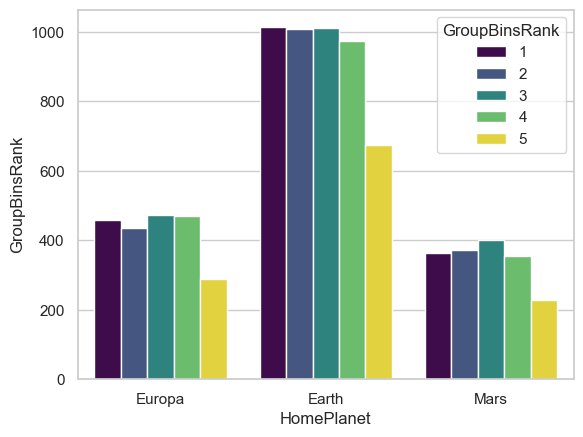

In [150]:
countplot(train_data, "HomePlanet", "GroupBinsRank")

### Converted Train Data to clear concise format.

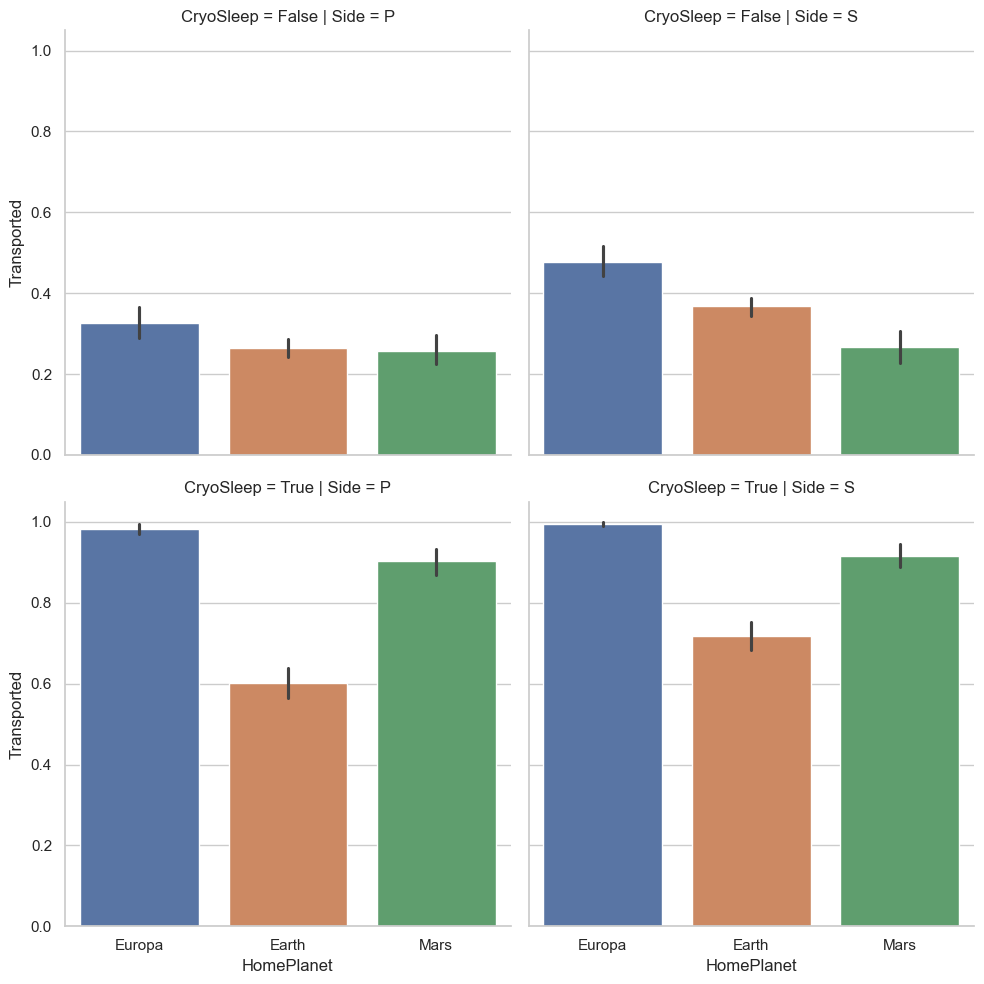

In [151]:
sns.catplot(data=train_data, x="HomePlanet", y="Transported", row="CryoSleep", col="Side", kind="bar", hue="HomePlanet");

# Data Frame for Model Training

In [152]:
df = train_data.copy()

In [153]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,TotalSpending,Transported,Deck,Side,CabinNum,CabinNumBinsRank,Group,GroupBins,GroupBinsStr,GroupBinsRank
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,False,B,P,0.0,1.0,1,"(0, 2000]","(0, 2000]",1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,736.0,True,F,S,0.0,1.0,2,"(0, 2000]","(0, 2000]",1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,10383.0,False,A,S,0.0,1.0,3,"(0, 2000]","(0, 2000]",1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,5176.0,False,A,S,0.0,1.0,3,"(0, 2000]","(0, 2000]",1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,1091.0,True,F,S,1.0,1.0,4,"(0, 2000]","(0, 2000]",1


In [154]:
df = df.drop(columns=["PassengerId", "CabinNum", "Group", "GroupBins", "GroupBinsStr"])

In [155]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,TotalSpending,Transported,Deck,Side,CabinNumBinsRank,GroupBinsRank
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,False,B,P,1.0,1
1,Earth,False,TRAPPIST-1e,24.0,False,736.0,True,F,S,1.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,10383.0,False,A,S,1.0,1
3,Europa,False,TRAPPIST-1e,33.0,False,5176.0,False,A,S,1.0,1
4,Earth,False,TRAPPIST-1e,16.0,False,1091.0,True,F,S,1.0,1


In [156]:
df["Transported"] = np.where(df["Transported"] == False, 0, 1)
df["CryoSleep"] = np.where(df["CryoSleep"] == False, 0, 1)
df["VIP"] = np.where(df["VIP"] == False, 0, 1)

In [157]:
df["HomePlanet"] = df["HomePlanet"].astype("category").cat.codes
df["Destination"] = df["Destination"].astype("category").cat.codes

In [158]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,TotalSpending,Transported,Deck,Side,CabinNumBinsRank,GroupBinsRank
0,1,0,2,39.0,0,0.0,0,B,P,1.0,1
1,0,0,2,24.0,0,736.0,1,F,S,1.0,1
2,1,0,2,58.0,1,10383.0,0,A,S,1.0,1
3,1,0,2,33.0,0,5176.0,0,A,S,1.0,1
4,0,0,2,16.0,0,1091.0,1,F,S,1.0,1


In [159]:
df["Deck"] = df["Deck"].astype("category").cat.codes
df["Side"] = df["Side"].astype("category").cat.codes

In [160]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,TotalSpending,Transported,Deck,Side,CabinNumBinsRank,GroupBinsRank
0,1,0,2,39.0,0,0.0,0,1,0,1.0,1
1,0,0,2,24.0,0,736.0,1,5,1,1.0,1
2,1,0,2,58.0,1,10383.0,0,0,1,1.0,1
3,1,0,2,33.0,0,5176.0,0,0,1,1.0,1
4,0,0,2,16.0,0,1091.0,1,5,1,1.0,1


In [161]:
df = df.astype("int32")

In [162]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,TotalSpending,Transported,Deck,Side,CabinNumBinsRank,GroupBinsRank
0,1,0,2,39,0,0,0,1,0,1,1
1,0,0,2,24,0,736,1,5,1,1,1
2,1,0,2,58,1,10383,0,0,1,1,1
3,1,0,2,33,0,5176,0,0,1,1,1
4,0,0,2,16,0,1091,1,5,1,1,1


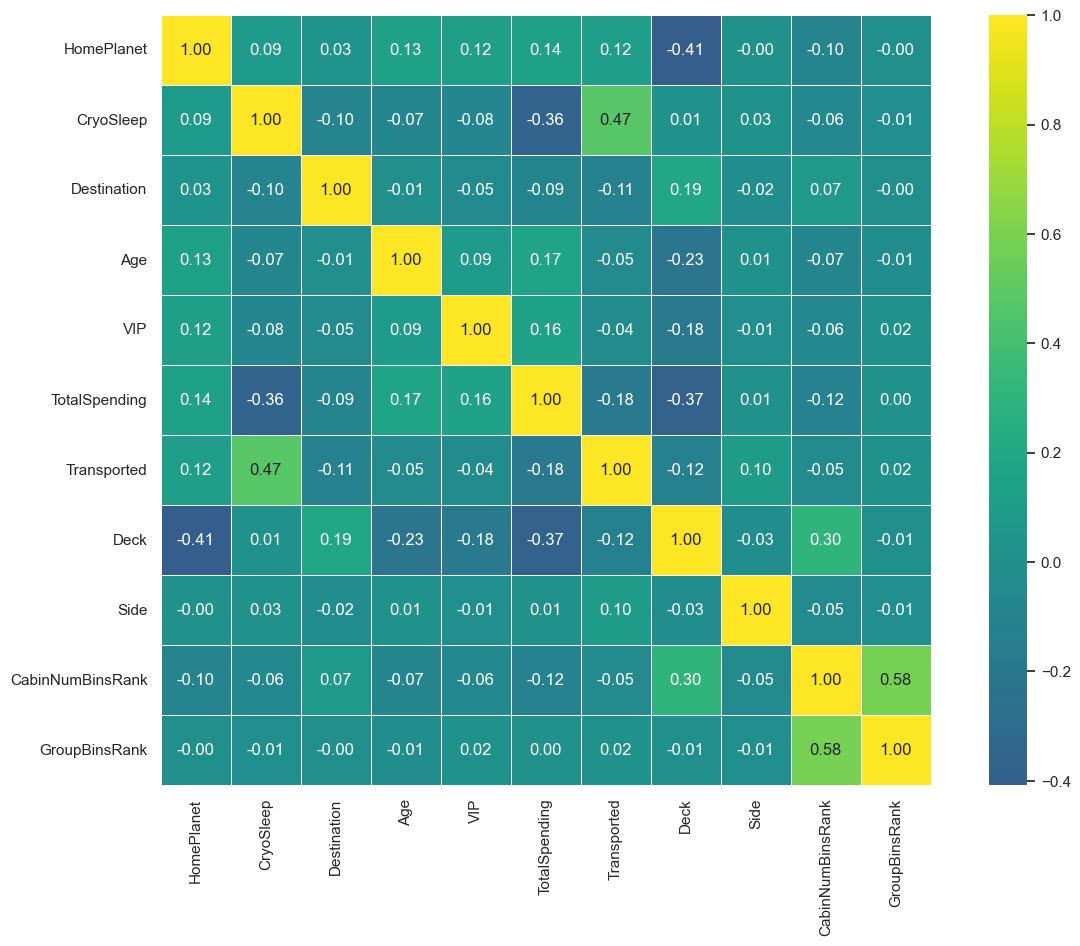

In [163]:
plt.figure(figsize = (15,10))
plt.rcParams.update({'font.size': 12})
sns.heatmap(df.corr(), cmap = 'viridis', center = 0, annot=True, fmt=".2f", square=True, linewidths=0.51)
plt.show()

## df is ready to train😎